# NASA ASTEROIDS CLASSIFICATION

### Importing Libraries

In [17]:
import pandas as pd
import numpy as np
from sklearn import preprocessing  
import imblearn
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.metrics import confusion_matrix

### Getting our Data

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\Kaggle+HE\Github GSSoC21\ML-ProjectYard\NASA Asteroids Classification C\Dataset\nasa.csv', encoding = 'unicode_escape')
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


### Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [4]:
df = df.drop(['Neo Reference ID','Name'], axis=1)

In [5]:
# no null values are present
# but, we need to encode some attributes
label_encoder = preprocessing.LabelEncoder()  # encoding data

In [6]:
a = ['Close Approach Date','Orbiting Body','Orbit Determination Date','Equinox','Hazardous']
for i in a:
    df[i] = df[i].astype('|S')
    df[i] = label_encoder.fit_transform(df[i])
df 

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,0,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,0,1
1,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,0,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0,0
2,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,0,1
3,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,2,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0,0
4,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,2,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,323.612307,776,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,0,0
4683,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,44.670934,776,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,0,0
4684,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,776,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,0,0
4685,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,851.187094,776,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,0,0


In [7]:
# now we'll check variance

In [8]:
df.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Close Approach Date', 'Epoch Date Close Approach',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [9]:
# checking variance
variables = df[['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Close Approach Date', 'Epoch Date Close Approach',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [10]:
vif

,VIF,Features
0,4.340988e+00,Absolute Magnitude
1,inf,Est Dia in KM(min)
2,inf,Est Dia in KM(max)
3,inf,Est Dia in M(min)
4,inf,Est Dia in M(max)
5,inf,Est Dia in Miles(min)
6,inf,Est Dia in Miles(max)
7,inf,Est Dia in Feet(min)
8,inf,Est Dia in Feet(max)
9,6.167477e+04,Close Approach Date


In [11]:
# dropping all columns having vif>10
df = df.drop(['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
              'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Relative Velocity km per sec', 
              'Relative Velocity km per hr', 'Miles per hour', 'Semi Major Axis'], axis = 1)
df

,Absolute Magnitude,Close Approach Date,Epoch Date Close Approach,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.600,0,788947200000,0.419483,163.178711,6.275369e+07,3.899334e+07,0,17,534,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,0,1
1,21.300,0,788947200000,0.383014,148.992630,5.729815e+07,3.560342e+07,0,21,432,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0,0
2,20.300,1,789552000000,0.050956,19.821890,7.622912e+06,4.736658e+06,0,22,1910,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,0,1
3,27.400,2,790156800000,0.285322,110.990387,4.268362e+07,2.652237e+07,0,7,1761,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0,0
4,21.600,2,790156800000,0.407832,158.646713,6.101082e+07,3.791037e+07,0,25,1190,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,776,1473318000000,0.041361,16.089413,6.187511e+06,3.844741e+06,0,4,166,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,0,0
4683,28.200,776,1473318000000,0.006469,2.516399,9.677324e+05,6.013211e+05,0,2,163,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,0,0
4684,22.700,776,1473318000000,0.061009,23.732393,9.126775e+06,5.671115e+06,0,17,159,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,0,0
4685,21.800,776,1473318000000,0.260760,101.435493,3.900908e+07,2.423912e+07,0,6,158,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,0,0


### Data Visualization

<AxesSubplot:xlabel='Hazardous', ylabel='count'>

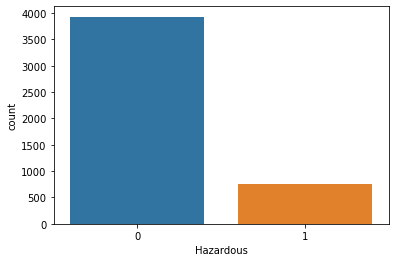

In [12]:
# checking the distribution of outcomes
sns.countplot(x = 'Hazardous', data = df)

In [13]:
# resampling is required as there is a class imbalance
# doing random over-sampling using imblearn

In [15]:
data = df.values
X, y = data[:,:-1], data[:,-1]

In [18]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable 
X_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0.0: 3932, 1.0: 755})
Resample dataset shape Counter({1.0: 3932, 0.0: 3932})


### Splitting Data for Training and Testing

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.20, random_state=0)  # splitting in the ratio 80:20

### Making Predictions using Naive Bayes Model

In [25]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

### Checking Accuracy

In [26]:
score = gnb.score(X_test, y_test)
score

0.5244755244755245

# Predictions are 84.54% accurate.

### Results' Visualization

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[445, 330],
       [418, 380]], dtype=int64)

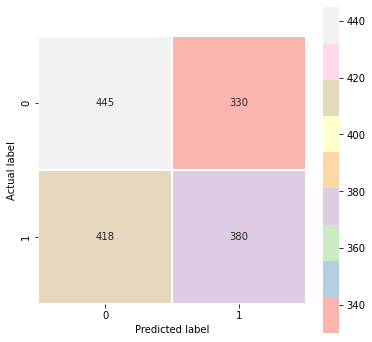

In [28]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Getting the pkl file

In [18]:
import pickle
pickle.dump(gnb, open('AsteroidClassification.pkl', 'wb'))